In [11]:
path = "E:\\DATA\\ML\\Numbers\\trainingSet"
labelFile = "E:\\DATA\\ML\\Numbers\\labels.csv"

In [12]:
import os
import cv2

In [13]:
myList = os.listdir(path)
NoOfClass = len(myList)

In [16]:
images = []
ClassNo = []
for i in range(0,NoOfClass):
    myPicList = os.listdir(path+"/"+str(i))
    for y in myPicList:
        Img=cv2.imread(path + "/" + str(i) + "/" + y)
        images.append(Img)
        ClassNo.append(i)
    print(i, " Done")  

0  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done


In [17]:
import numpy as np

In [18]:
images = np.array(images)
ClassNo = np.array(ClassNo)

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(images,ClassNo,test_size=0.2)
X_train,X_validation,Y_train,Y_validation = train_test_split(images,ClassNo,test_size=0.2)

In [24]:
X_train.shape

(33600, 28, 28, 3)

In [25]:
X_validation.shape

(8400, 28, 28, 3)

In [27]:
import pandas as pd
data=pd.read_csv(labelFile)
import matplotlib.pyplot as plt
import random

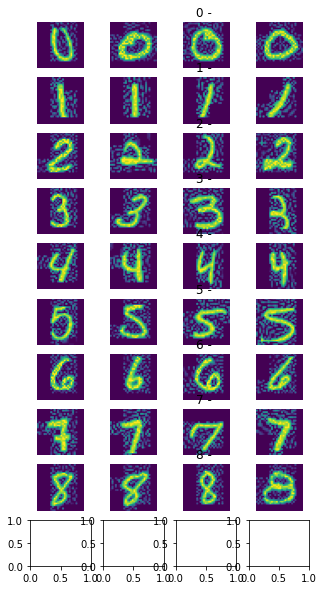

In [39]:
num_of_samples=[]
cols=4
num_Classes=NoOfClass
fig,axs=plt.subplots(nrows=num_Classes,ncols=cols,figsize=(5,10))
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[Y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:])
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - ")
            num_of_samples.append(len(x_selected))

In [6]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255
    return img

In [38]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [41]:
cv2.imshow("Grayscale Image",X_train[random.randint(0,len(X_train)-1)])
cv2.waitKey(0)

-1

In [42]:
X_train.shape

(33600, 28, 28)

In [44]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [47]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)
dataGen.fit(X_train)
batches=dataGen.flow(X_train,Y_train,batch_size=20)

In [48]:
X_batch,Y_batch=next(batches)

In [49]:
imageDimensions=(32,32,3)

In [50]:
X_batch.shape

(20, 28, 28, 1)

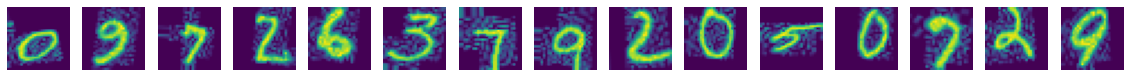

In [52]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(28,28))
    axs[i].axis("off")
plt.show()

In [53]:
from keras.utils.np_utils import to_categorical

In [55]:
Y_train=to_categorical(Y_train,NoOfClass)

In [56]:
Y_test=to_categorical(Y_test,NoOfClass)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [8]:
def myModel():
    model=Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(28,28,1),activation="relu"))
    model.add(Conv2D(60,(5,5),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))
    model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
    return model
    

In [9]:
model=myModel()
X_train.shape

NameError: name 'Sequential' is not defined

In [79]:
history=model.fit_generator(dataGen.flow(X_train,Y_train,batch_size=50),epochs=20)

Epoch 1/20
672/672 [==============================] - 63s 93ms/step - loss: 0.4401 - accuracy: 0.8669
Epoch 2/20
672/672 [==============================] - 64s 96ms/step - loss: 0.2235 - accuracy: 0.9374
Epoch 3/20
672/672 [==============================] - 62s 93ms/step - loss: 0.1774 - accuracy: 0.9516
Epoch 4/20
672/672 [==============================] - 63s 94ms/step - loss: 0.1455 - accuracy: 0.9592
Epoch 5/20
672/672 [==============================] - 62s 93ms/step - loss: 0.1300 - accuracy: 0.9650
Epoch 6/20
672/672 [==============================] - 62s 93ms/step - loss: 0.1234 - accuracy: 0.9665
Epoch 7/20
672/672 [==============================] - 62s 92ms/step - loss: 0.1080 - accuracy: 0.9713
Epoch 8/20
672/672 [==============================] - 62s 92ms/step - loss: 0.1032 - accuracy: 0.9719
Epoch 9/20
672/672 [==============================] - 62s 92ms/step - loss: 0.0945 - accuracy: 0.9747
Epoch 10/20
672/672 [==============================] - 62s 93ms/step - loss: 0.089

In [2]:
import numpy as np
import cv2

def getCalssName(ClassNo):
    if ClassNo==0: return "ZERO"
    elif ClassNo == 1: return "ONE"
    elif ClassNo == 2: return "TWO"
    elif ClassNo == 3: return "THREE"
    elif ClassNo== 4: return "FOUR"
    elif ClassNo == 5: return "FIVE"
    elif ClassNo ==6: return "SIX"
    elif ClassNo == 7: return "SEVEN"
    elif ClassNo == 8: return "EIGHT"
    elif ClassNo == 9: return "NINE"

In [3]:
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)

False

In [7]:
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    success,imgOriginal=cap.read()
    img=np.asarray(imgOriginal)
    img=cv2.resize(img,(32,32))
    img=preprocessing(img)
    cv2.imshow("Processed Image",img)
    img=img.reshape(1,32,32,1)
    cv2.putText(imgOriginal,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOriginal,"Probability: ",(150,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    predictions=model.predict(img)
    classIndex=model.predict_classes(img)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(imgOriginal,str(classIndex) + " "+ str(getCalssName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgOriginal,str(round(probabilityValue*100,2)) + "%",(120,150),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1)==113:
        cv2.destroyAllWindows()
        break

NameError: name 'model' is not defined

In [87]:
X_train.shape

(33600, 28, 28, 1)